<a href="https://colab.research.google.com/github/srimaailuri/Machine_learning/blob/master/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
#from google.colab import drive
#drive.mount('/content/drive')

In [97]:
#drive.flush_and_unmount()

In [98]:
dataset=pd.read_csv('/content/heart_disease.csv')

In [99]:
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [100]:
dataset.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [101]:
dataset=dataset.drop(['education'],axis=1)

In [102]:
gk=dataset.groupby('currentSmoker')

In [103]:
gk.get_group(0).isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay           0
BPMeds              30
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             19
sysBP                0
diaBP                0
BMI                 12
heartRate            0
glucose            183
TenYearCHD           0
dtype: int64

In [104]:
one_group=gk.get_group(1)
one_group['cigsPerDay'].mean()

18.350605326876515

<Axes: >

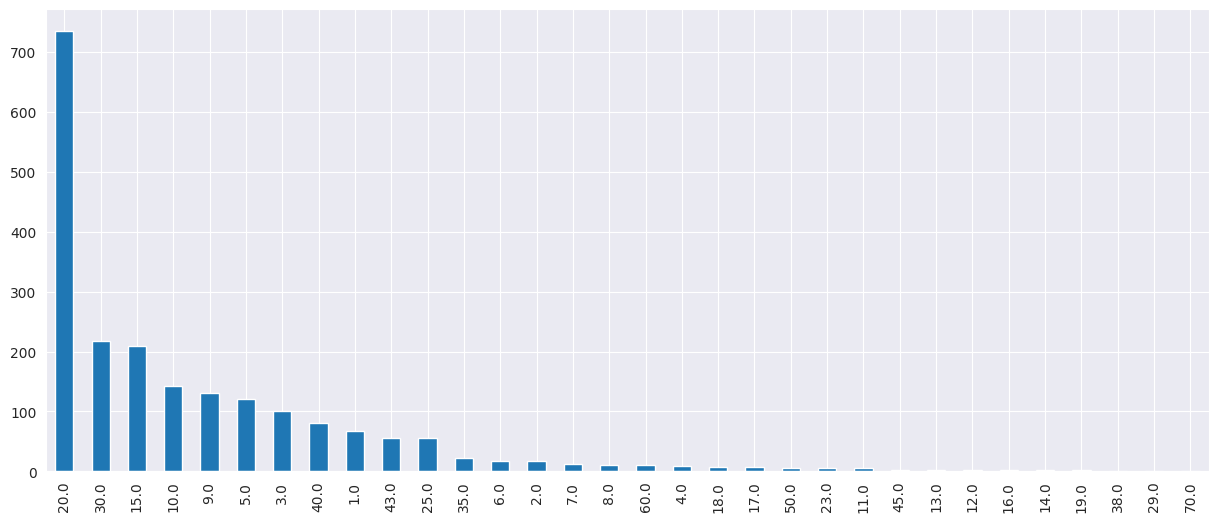

In [105]:
one_group['cigsPerDay'].value_counts().plot(kind='bar')

In [106]:
from sklearn.impute import SimpleImputer
dataset['cigsPerDay']=dataset['cigsPerDay'].fillna(18)
dataset.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<Axes: xlabel='BPMeds,prevalentStroke'>

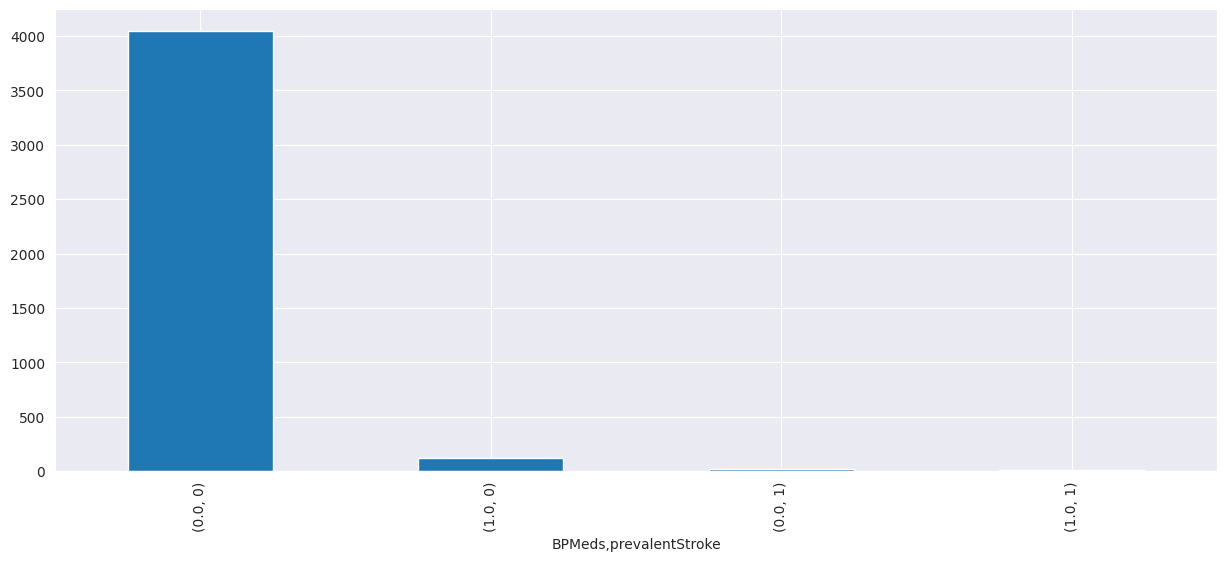

In [107]:
dataset[['BPMeds','prevalentStroke']].value_counts().plot(kind='bar')

In [108]:
dataset[['BPMeds','prevalentStroke']].value_counts()

BPMeds  prevalentStroke
0.0     0                  4044
1.0     0                   117
0.0     1                    17
1.0     1                     7
dtype: int64

In [109]:
dataset[['totChol']].value_counts()

totChol
240.0      85
220.0      70
260.0      62
210.0      61
232.0      59
           ..
356.0       1
359.0       1
360.0       1
361.0       1
696.0       1
Length: 248, dtype: int64

In [110]:
gk_TenYearCHD=dataset.groupby('TenYearCHD')

In [111]:
gk_TenYearCHD.get_group(0)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [112]:
gk_TenYearCHD.get_group(0).totChol.mean()

235.17253025612158

In [113]:
gk_TenYearCHD.get_group(1).totChol.mean()

245.38897637795276

In [114]:
gk_TenYearCHD.get_group(0).totChol.isnull().sum()

41

In [115]:
gk_TenYearCHD.get_group(1).totChol.isnull().sum()

9

As more null values are in 0 so mean to be filled is 235

In [116]:
dataset['totChol']=dataset['totChol'].fillna(235)

After observing the above cases, we can clearly say there are more probability for 0 so i am going to fill NaN with 0.

In [117]:
dataset.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [118]:
gk_TenYearCHD.get_group(0).BMI.mean()

25.673006973500698

In [119]:
gk_TenYearCHD.get_group(1).BMI.mean()

26.531451104100945

In [120]:
dataset['BMI']=dataset['BMI'].fillna(25)

In [121]:
gk_TenYearCHD.get_group(0).heartRate.mean()

75.7623817473567

In [122]:
gk_TenYearCHD.get_group(1).heartRate.mean()

76.5303265940902

In [123]:
dataset['heartRate']=dataset['heartRate'].fillna(75)

In [124]:
gk_TenYearCHD.get_group(0).glucose.mean()

80.6821253071253

In [125]:
gk_TenYearCHD.get_group(1).glucose.mean()

89.00841750841751

In [126]:
dataset['glucose']=dataset['glucose'].fillna(85)

In [127]:
dataset['BPMeds']=dataset['BPMeds'].fillna(0)

In [128]:
dataset[['BPMeds','prevalentStroke']].value_counts()

BPMeds  prevalentStroke
0.0     0                  4096
1.0     0                   117
0.0     1                    18
1.0     1                     7
dtype: int64

<Axes: >

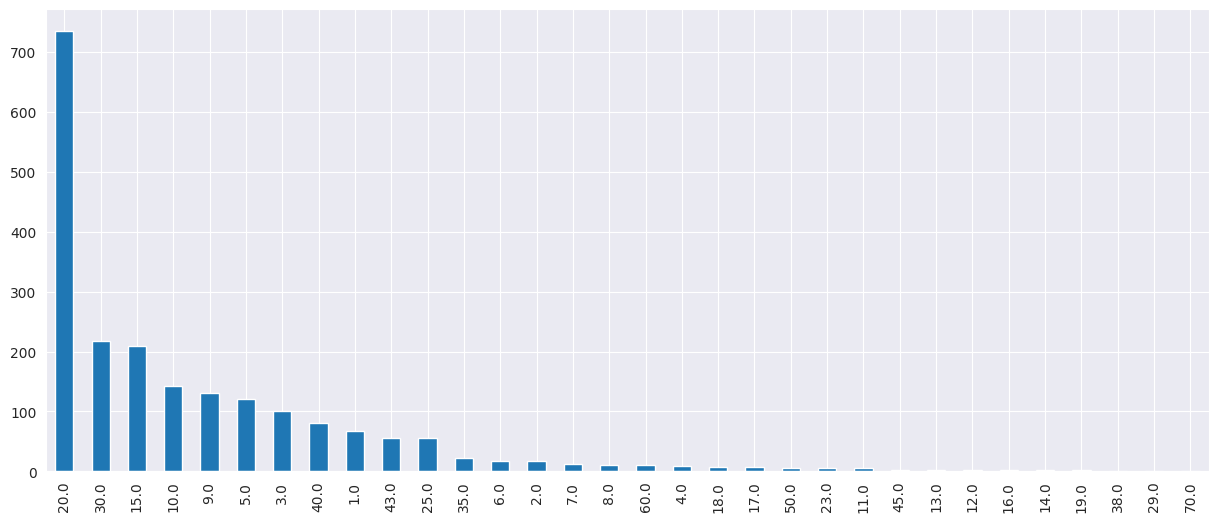

In [129]:
one_group['cigsPerDay'].value_counts().plot(kind='bar')

In [130]:
#dataset['age'].min(),dataset['age'].max()

In [131]:
#dataset['age']=pd.cut(dataset['age'],bins=[30,36,42,48,54,60,66,72],labels=['30-36 years age','36-42 years age','42-48 years age','48-54 years age','54-60 years age','60-66 years age','66-72 years age'])

In [132]:
import seaborn as sns
#sns.pairplot(dataset)

In [133]:
#dataset['male']=dataset['male'].replace([0,1],['female','male'])
#dataset.rename(columns={'male':'sex'},inplace=True)
#dataset.head()

In [134]:
#dataset['sex'].value_counts().plot(kind='bar')

In [135]:
#dataset[['sex','TenYearCHD']].value_counts().plot(kind='bar')

In [136]:
#dataset[['sex','TenYearCHD']].value_counts(),dataset['sex'].value_counts()

In [137]:
343/2419,301/1819

(0.14179412980570483, 0.16547553600879605)

If you have clearly observed ratio of people suffereing from heart disease is very few and also male is tend to have more heart disease as compared to female

In [138]:
dataset.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [139]:
dataset.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


[0.01965474 0.13749168 0.01291501 0.05453626 0.00817649 0.00575227
 0.02478004 0.00976231 0.1182966  0.13411958 0.12428223 0.12040715
 0.10975744 0.12006819]


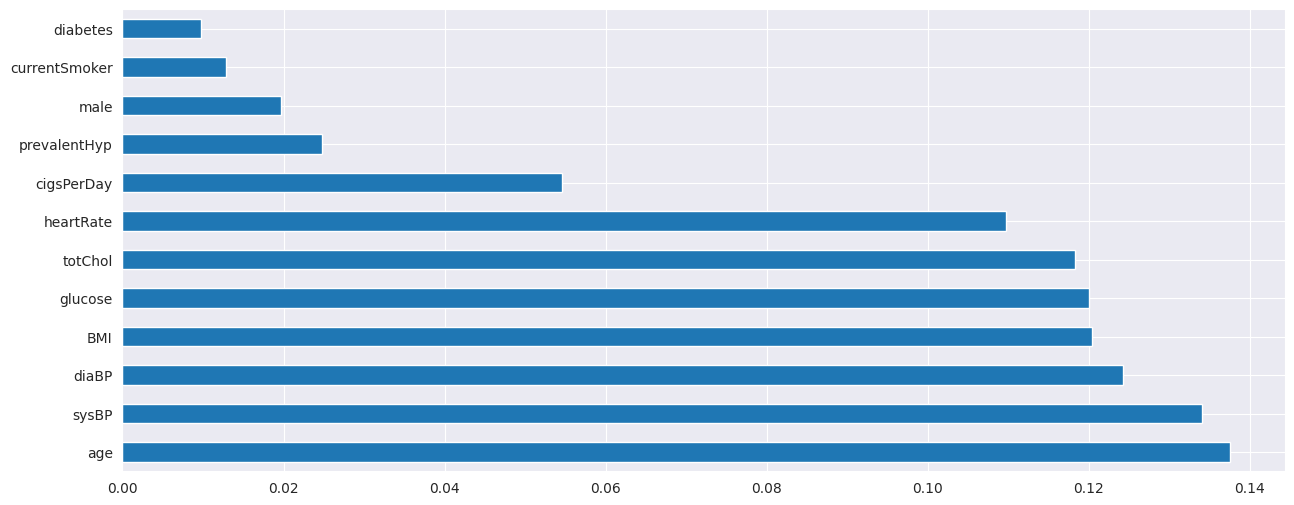

In [141]:
plt.rcParams['figure.figsize']=15,6
sns.set_style("darkgrid")

x = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [145]:
new_dataset=dataset[['cigsPerDay','heartRate','totChol','glucose','BMI','diaBP','sysBP','age']]

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
model=LogisticRegression()

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
y=dataset['TenYearCHD']

In [154]:
x_train,x_test,y_train,y_test=train_test_split(new_dataset,y,test_size=0.25)

In [155]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [156]:
y_pred=model.predict(x_test)

In [157]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8415094339622642

In [158]:
top_3_dataset=dataset[['diaBP','sysBP','age']]

In [167]:
x_train,x_test,y_train,y_test=train_test_split(top_3_dataset,y,test_size=0.25)

In [168]:
model.fit(x_train,y_train)

LogisticRegression()

In [169]:
y_pred=model.predict(x_test)

In [170]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.840566037735849

 ** Visualisation between age and TenYearCHD **




<Axes: xlabel='age,TenYearCHD'>

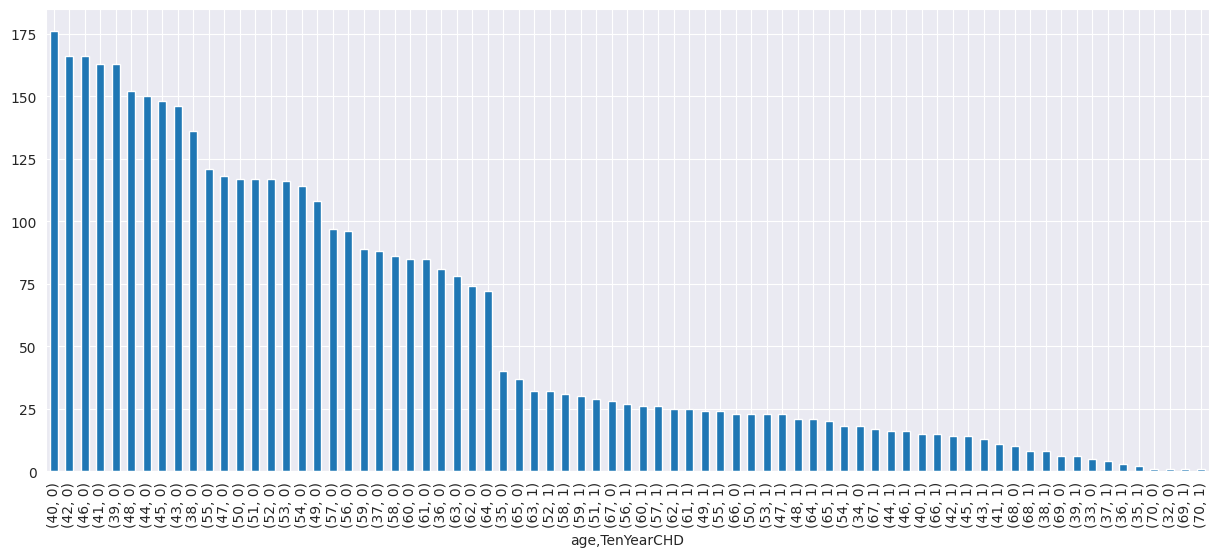

In [171]:
dataset[['age','TenYearCHD']].value_counts().plot(kind='bar')

In [172]:
dataset['age'].min(),dataset['age'].max()

(32, 70)

In [176]:
Age=pd.cut(dataset['age'],bins=[30,36,42,48,54,60,66,72],labels=['30-36 years age','36-42 years age','42-48 years age','48-54 years age','54-60 years age','60-66 years age','66-72 years age'])

TypeError: ignored

<Axes: xlabel='age,TenYearCHD'>

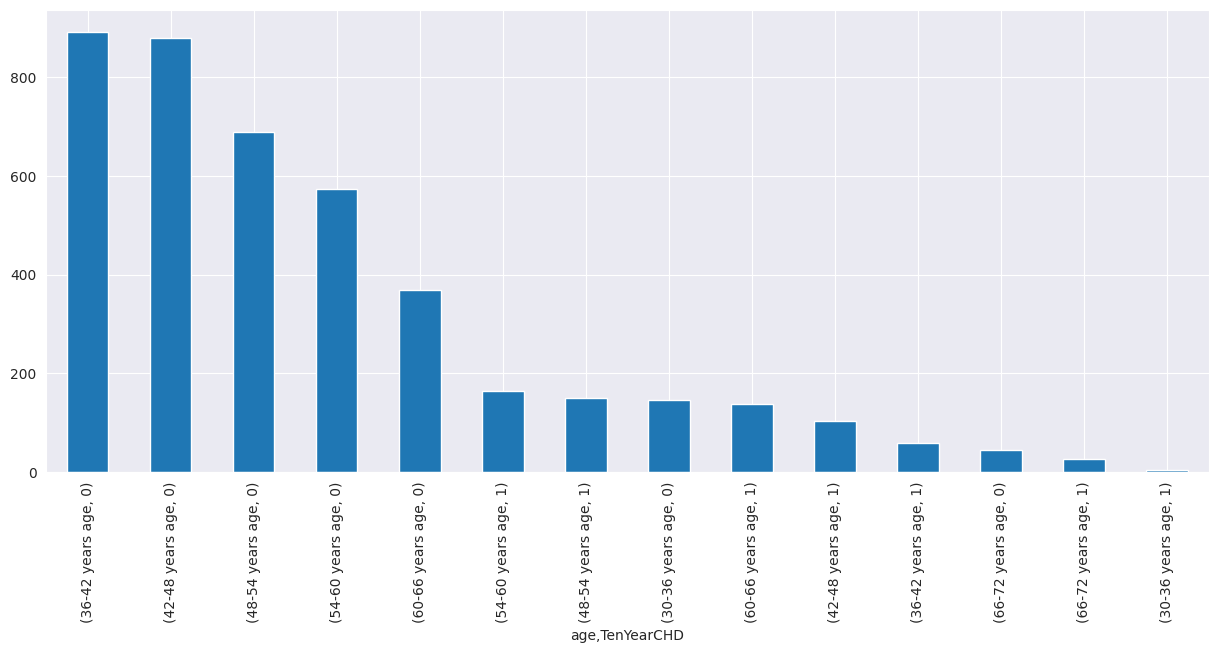

In [177]:
dataset[['age','TenYearCHD']].value_counts().plot(kind='bar')